In [8]:
import pandas as pd
import seaborn as sns
sns.set(font_scale=2, style="whitegrid", rc={'figure.figsize' : (20,7)}
        )
df_customers  = pd.read_csv('https://drive.google.com/uc?id=1P7oRu4FiJM2Vp8pd0YnmDybb-k2NYZuM') 
df_orders     = pd.read_csv('https://drive.google.com/uc?id=1YImQmfaKE5hM-k1jhczuGhj4jycc5Rmh')
df_items      = pd.read_csv('https://drive.google.com/uc?id=1q_mVm-lkLQU1fj0CSCY-j8ru5lzauFNb')

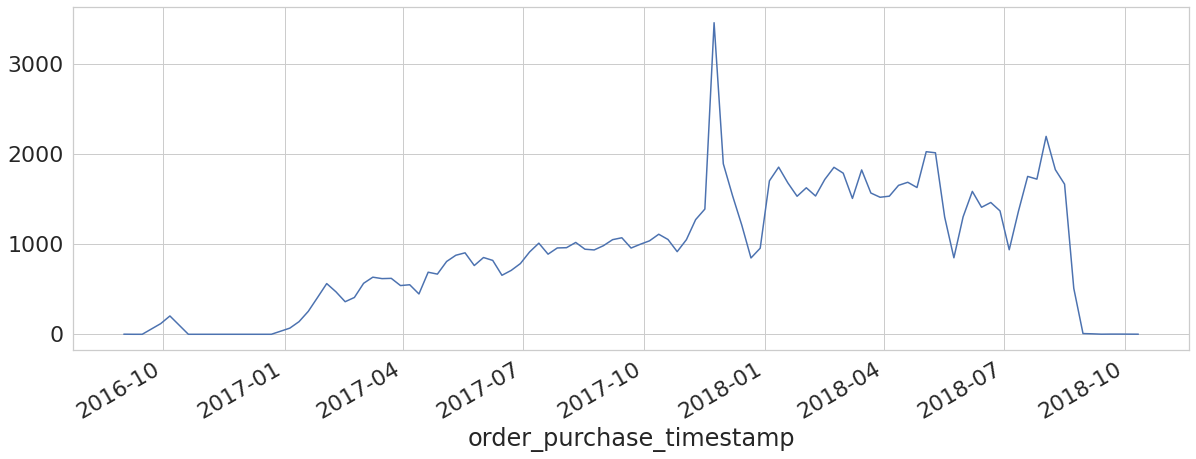

In [115]:
df_orders.order_purchase_timestamp = df_orders.order_purchase_timestamp.astype('datetime64[W]')
df_orders.groupby('order_purchase_timestamp').order_id.count().plot()

In [116]:
df_orders.groupby('order_purchase_timestamp').order_id.count().tail(10)

order_purchase_timestamp
2018-08-02    2195
2018-08-09    1826
2018-08-16    1665
2018-08-23     510
2018-08-30       9
2018-09-06       6
2018-09-13       2
2018-09-20       3
2018-09-27       3
2018-10-11       2
Name: order_id, dtype: int64

RFM анализ как-будто имеет смысл при наличии пула постоянных заказчиков с регулярными заказами.
В нашем датасете 90+% клиентов сделали 1 заказ, а значит понятия recenty и frequency вроде бы превращаются в тыкву.
Кроме того, судя по графику и его хвосту, RFM анализ еще имел смысл в середине августа 2018, после этого уже все было кончено.
Поэтому будем строить анализ на сентябрь 2018 за период с января 2018, в этом периоде бизнес в целом имел некоторе устоявшееся состояние. В предшествующие же периоды состояние дел явно серьезным образом отличалось. 

In [117]:
df_i = df_items.groupby('order_id', as_index = False)\
        .agg({'price':'sum'})\
        .rename(columns = {'price':'order_revenue'})
df_i

,order_id,order_revenue
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,350.00
98663,fffce4705a9662cd70adb13d4a31832d,99.90
98664,fffe18544ffabc95dfada21779c9644f,55.99


In [118]:
df_o = df_orders.merge(df_i, on = 'order_id', how  ='left')[['order_id',
                                                          'customer_id',
                                                          'order_purchase_timestamp',
                                                          'order_revenue']]
df_o

,order_id,customer_id,order_purchase_timestamp,order_revenue
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-09-28,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-19,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-02,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-16,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-08,19.90
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09,72.00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-01,174.90
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-24,205.99
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-04,359.98


In [119]:
df = df_customers.merge(df_o, on = 'customer_id', how  ='left')
df = df.loc[df.order_purchase_timestamp >= '2018-01-01']\
       .loc[df.order_purchase_timestamp <= '2018-08-31']
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_purchase_timestamp,order_revenue
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,2018-01-11,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-17,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,2018-03-08,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-26,230.00
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,2018-02-15,14.99
...,...,...,...,...,...,...,...,...
99432,f255d679c7c86c24ef4861320d5b7675,d111b06b6f3a2add0d2241325f65b5ca,13500,rio claro,SP,ca978d2459ea2c5ef6d5fde02be26b9c,2018-03-01,99.00
99434,f5a0b560f9e9427792a88bec97710212,b3e53d18a997f27a3ffd16da497eaf58,7790,cajamar,SP,97d6c1727b0d36b8d04035e35d86f40f,2018-05-17,124.90
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,2018-04-05,74.90
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-03-29,114.90


In [120]:
df = df.groupby('customer_unique_id', as_index = False)\
       .agg({'order_purchase_timestamp':'max', 'order_id':'count', 'order_revenue':'sum'})\
       .rename(columns = {'order_purchase_timestamp':'recency', 'order_id':'frequency', 'order_revenue': 'monetary'})

In [121]:
df.recency = pd.to_datetime(df.recency)

In [122]:
df.recency = pd.Timestamp("2018-09-01") - df.recency
df

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,114 days,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,121 days,1,18.90
2,0004bd2a26a76fe21f786e4fbd80607f,149 days,1,154.00
3,00050ab1314c0e55a6ca13cf7181fecf,135 days,1,27.99
4,00053a61a98854899e70ed204dd4bafe,191 days,1,382.00
...,...,...,...,...
52250,fff3e1d7bc75f11dc7670619b2e61840,44 days,1,54.85
52251,fff5eb4918b2bf4b2da476788d42051c,65 days,1,1050.00
52252,fff96bc586f78b1f070da28c4977e810,23 days,1,45.00
52253,fffcc512b7dfecaffd80f13614af1d16,149 days,1,688.00


In [123]:
df.recency = df.recency.astype('timedelta64[D]').astype(int)
df

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,114,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,121,1,18.90
2,0004bd2a26a76fe21f786e4fbd80607f,149,1,154.00
3,00050ab1314c0e55a6ca13cf7181fecf,135,1,27.99
4,00053a61a98854899e70ed204dd4bafe,191,1,382.00
...,...,...,...,...
52250,fff3e1d7bc75f11dc7670619b2e61840,44,1,54.85
52251,fff5eb4918b2bf4b2da476788d42051c,65,1,1050.00
52252,fff96bc586f78b1f070da28c4977e810,23,1,45.00
52253,fffcc512b7dfecaffd80f13614af1d16,149,1,688.00


Расчитаем границы диапазонов для присвоения рейтинга по recency, frequency и monetary

In [124]:
quintiles = df[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 51.0, 0.4: 107.0, 0.6: 156.0, 0.8: 198.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 39.0, 0.4: 69.9, 0.6: 109.99, 0.8: 179.0}}

In [125]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [126]:
df['R'] = df['recency'].apply(lambda x: r_score(x))
df['F'] = df['frequency'].apply(lambda x: fm_score(x, 'frequency'))
df['M'] = df['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [127]:
df

,customer_unique_id,recency,frequency,monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,114,1,129.90,3,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,121,1,18.90,3,1,1
2,0004bd2a26a76fe21f786e4fbd80607f,149,1,154.00,3,1,4
3,00050ab1314c0e55a6ca13cf7181fecf,135,1,27.99,3,1,1
4,00053a61a98854899e70ed204dd4bafe,191,1,382.00,2,1,5
...,...,...,...,...,...,...,...
52250,fff3e1d7bc75f11dc7670619b2e61840,44,1,54.85,5,1,2
52251,fff5eb4918b2bf4b2da476788d42051c,65,1,1050.00,4,1,5
52252,fff96bc586f78b1f070da28c4977e810,23,1,45.00,5,1,2
52253,fffcc512b7dfecaffd80f13614af1d16,149,1,688.00,3,1,5


In [128]:
df['rfm_score'] = df['R'].map(str) + df['F'].map(str) + df['M'].map(str)
df

,customer_unique_id,recency,frequency,monetary,R,F,M,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,114,1,129.90,3,1,4,314
1,0000b849f77a49e4a4ce2b2a4ca5be3f,121,1,18.90,3,1,1,311
2,0004bd2a26a76fe21f786e4fbd80607f,149,1,154.00,3,1,4,314
3,00050ab1314c0e55a6ca13cf7181fecf,135,1,27.99,3,1,1,311
4,00053a61a98854899e70ed204dd4bafe,191,1,382.00,2,1,5,215
...,...,...,...,...,...,...,...,...
52250,fff3e1d7bc75f11dc7670619b2e61840,44,1,54.85,5,1,2,512
52251,fff5eb4918b2bf4b2da476788d42051c,65,1,1050.00,4,1,5,415
52252,fff96bc586f78b1f070da28c4977e810,23,1,45.00,5,1,2,512
52253,fffcc512b7dfecaffd80f13614af1d16,149,1,688.00,3,1,5,315


Самая печальная ситуация с frequency

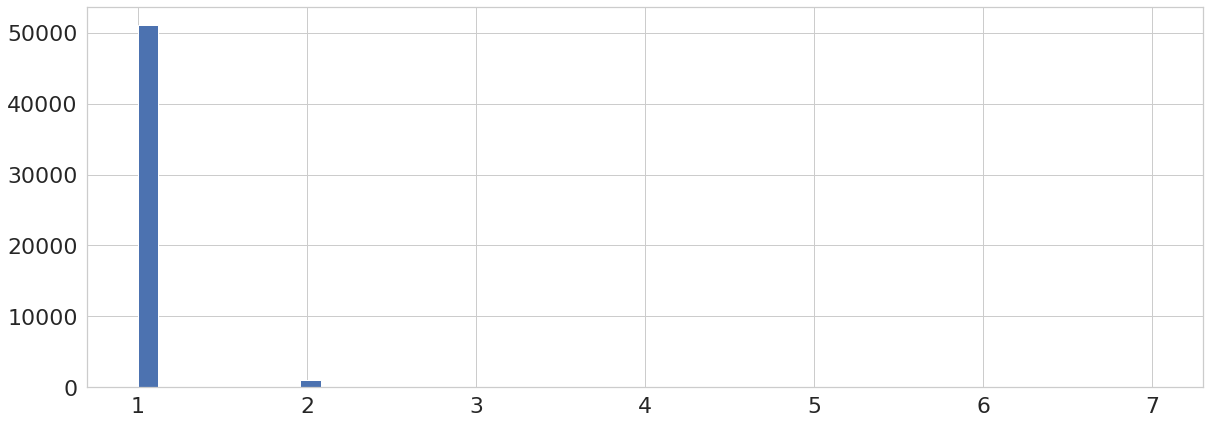

In [129]:
df.frequency.hist(bins = 50)

frequency оценивать бессмысленно, заказчиков, размещающих заказы регулярно у нас практически нет
поэтому будем смотреть на recency и monetary

In [130]:
segment = {
    r'[1-2][1-2]': 'дятлы! -(',
    r'[1-2][3-4]': 'ну если прямо нечем заняться',
    r'[1-2]5': 'забытые зайцы, надо звонить',
    r'3[1-2]': 'потеннциальные дятлы! -(',
    r'33': 'нужно попробовать',
    r'[3-4][4-5]': 'потенциальные зайцы!',
    r'41': 'копейки. по ходу дятлы',
    r'51': 'узнать не дятлы ли, случаем?',
    r'[4-5][2-3]': 'возможно, будущие заяцы',
    r'5[4-5]': 'зайцы!!!'
}

df['Segment'] = df['R'].map(str) + df['M'].map(str)
df['Segment'] = df['Segment'].replace(segment, regex=True)

In [131]:
df = df[['customer_unique_id', 'recency', 'monetary', 'rfm_score', 'Segment']]
df

,customer_unique_id,recency,monetary,rfm_score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,114,129.90,314,потенциальные зайцы!
1,0000b849f77a49e4a4ce2b2a4ca5be3f,121,18.90,311,потеннциальные дятлы! -(
2,0004bd2a26a76fe21f786e4fbd80607f,149,154.00,314,потенциальные зайцы!
3,00050ab1314c0e55a6ca13cf7181fecf,135,27.99,311,потеннциальные дятлы! -(
4,00053a61a98854899e70ed204dd4bafe,191,382.00,215,"забытые зайцы, надо звонить"
...,...,...,...,...,...
52250,fff3e1d7bc75f11dc7670619b2e61840,44,54.85,512,"возможно, будущие заяцы"
52251,fff5eb4918b2bf4b2da476788d42051c,65,1050.00,415,потенциальные зайцы!
52252,fff96bc586f78b1f070da28c4977e810,23,45.00,512,"возможно, будущие заяцы"
52253,fffcc512b7dfecaffd80f13614af1d16,149,688.00,315,потенциальные зайцы!


In [132]:
df.groupby('Segment').Segment.count()

Segment
возможно, будущие заяцы         8382
дятлы! -(                       8346
забытые зайцы, надо звонить     3743
зайцы!!!                        4293
копейки. по ходу дятлы          2021
ну если прямо нечем заняться    7403
нужно попробовать               2221
потеннциальные дятлы! -(        4676
потенциальные зайцы!            8958
узнать не дятлы ли, случаем?    2212
Name: Segment, dtype: int64